### EDA for Student Test Predictin Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
df=pd.read_csv("data/stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

In [6]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [11]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [15]:
print("The categories in gender:    ",end="")
print(df['gender'].unique())
print("The categories in race:    ",end="")
print(df['race_ethnicity'].unique())
print("The categories in parental level of education:    ",end="")
print(df['parental_level_of_education'].unique())
print("The categories in lunch:    ",end="")
print(df['lunch'].unique())
print("The categories in test preparation course:    ",end="")
print(df['test_preparation_course'].unique())

The categories in gender:    ['female' 'male']
The categories in race:    ['group B' 'group C' 'group A' 'group D' 'group E']
The categories in parental level of education:    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
The categories in lunch:    ['standard' 'free/reduced']
The categories in test preparation course:    ['none' 'completed']


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [19]:
numeric_cols=[features for features in df.columns if df[features].dtype != 'object']
categorical_cols=[features for features in df.columns if df[features].dtype == 'object']
print(f"We have {len(numeric_cols)} Numeric columns: ",numeric_cols)
print(f"We have {len(categorical_cols)} Categorical columns: ",categorical_cols)

We have 3 Numeric columns:  ['math_score', 'reading_score', 'writing_score']
We have 5 Categorical columns:  ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [27]:
df["Total_score"]=df["math_score"]+df["reading_score"]+df["writing_score"]
df["Average_score"]=df["Total_score"]/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [23]:
reading_score_mean=df["reading_score"].mean()
writing_score_mean=df["writing_score"].mean()
math_score_mean=df["math_score"].mean()
reading_full=df[df["reading_score"]==100]['Average_score'].count()
writing_full=df[df["writing_score"]==100]['Average_score'].count()  
math_full=df[df["math_score"]==100]['Average_score'].count()
print("The number of students who got full marks in reading is: ",reading_full)
print("The number of students who got full marks in writing is: ",writing_full)
print("The number of students who got full marks in math is: ",math_full)
print("The mean of reading score is: ",reading_score_mean)
print("The mean of writing score is: ",writing_score_mean)
print("The mean of math score is: ",math_score_mean)

The number of students who got full marks in reading is:  17
The number of students who got full marks in writing is:  14
The number of students who got full marks in math is:  7
The mean of reading score is:  69.169
The mean of writing score is:  68.054
The mean of math score is:  66.089


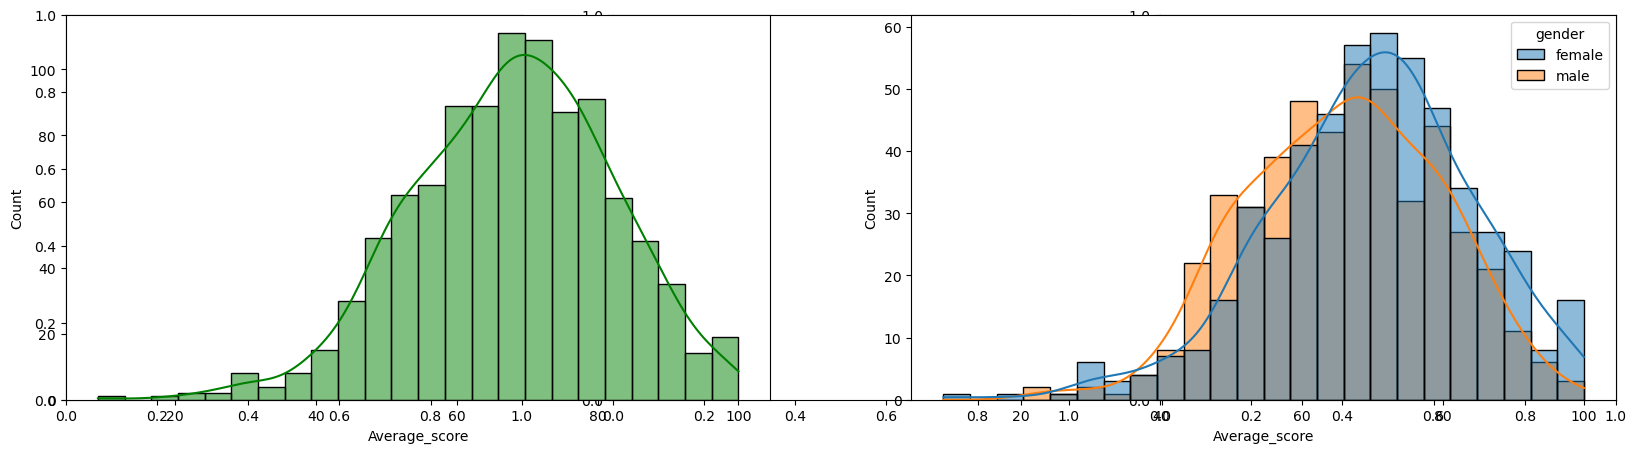

In [25]:
fig,axes=plt.subplots(1,3,figsize=(20,5))
plt.subplot(121)
sns.histplot(data=df,x="Average_score",kde=True,color="green")
plt.subplot(122)
sns.histplot(data=df,x="Average_score",kde=True,hue="gender",color="orange")
plt.show()


In [28]:
df.to_csv("student_with_avg_score.csv", index=False)
